# Logistic Regression - Perceptron Trick

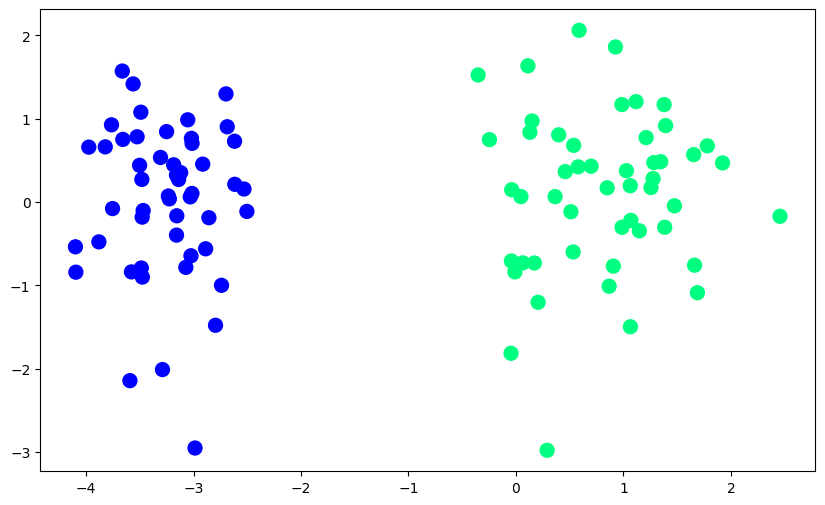

In [157]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y ,cmap='winter',s=100)

In [158]:
def perceptron (X,y):
    X =np.insert(X,0,1,axis=1) # adding the one  columns
    weights =np.ones(X.shape[1]) # creating the matrix
    lr =0.1 # learning rate 
    
    for i in range(500):
        j =np.random.randint(0,100)
        y_hat =step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        return weights[0],weights[1:]
    
def step(y_hat):
     return 1 if y_hat>0 else 0    
    
 
    
   
    

In [159]:
intercept_ ,coef_ =perceptron(X,y)

In [160]:
print(intercept_)
print(coef_)

1.0
[1. 1.]


In [161]:
m  = -(coef_[0]/coef_[1])
b =-(intercept_/coef_[1])

In [162]:
x_input = np.linspace(-3,3,100)
y_input =m*x_input + b

(-3.0, 2.0)

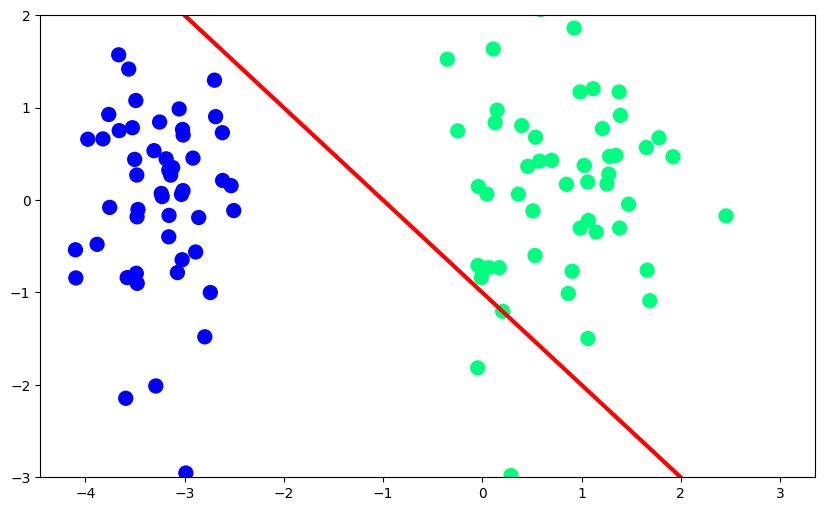

In [163]:


plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color ='red',linewidth =3
         )
plt.scatter(X[:,0],X[:,1],c =y,cmap='winter',s =100)
plt.ylim(-3,2)

# Using Sklearn 

In [164]:
from sklearn.linear_model import LogisticRegression
lor =LogisticRegression()
lor.fit(X,y)


LogisticRegression()

In [165]:
m_lor = -(lor.coef_[0][0]/lor.coef_[0][1])
b_lor = -(lor.intercept_/lor.coef_[0][1])






In [166]:
x_input1 = np.linspace(-3,3,100)
y_input1 =m_lor*x_input1 + b_lor

(-3.0, 2.0)

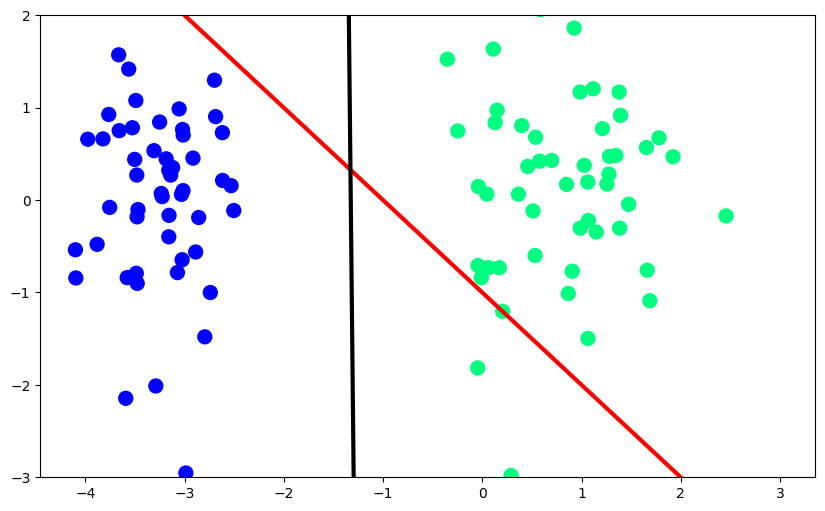

In [167]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color ='red',linewidth =3
         )
plt.plot(x_input1,y_input1,color ='black',linewidth =3)
plt.scatter(X[:,0],X[:,1],c =y,cmap='winter',s =100)
plt.ylim(-3,2)

# Using Sigmod Function 

2.8102216847158066
[2.8176427  0.17824186]


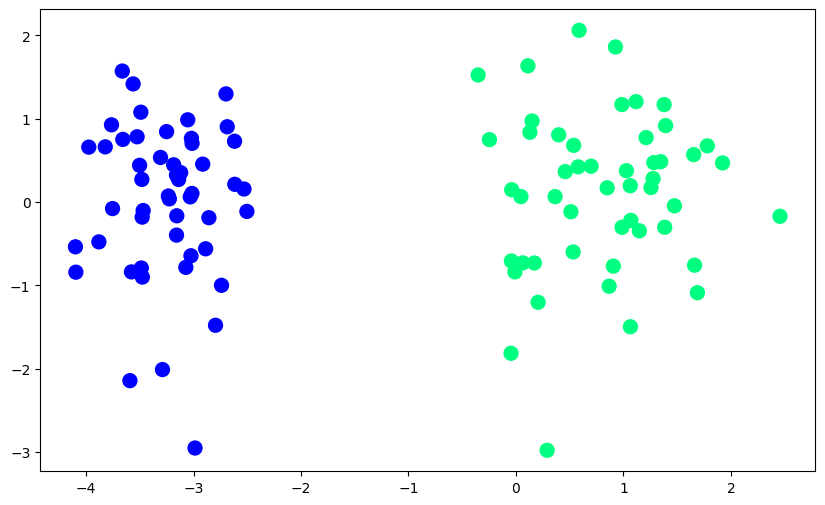

In [194]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, 
                           hypercube=False, class_sep=20)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.ones(X.shape[1])  # Initialize weights
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, X.shape[0])  # Pick a random sample
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]  # Update weights

    return weights[0], weights[1:]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

intercept_, coef_ = perceptron(X, y)
print(intercept_)
print(coef_)


(-3.0, 2.0)

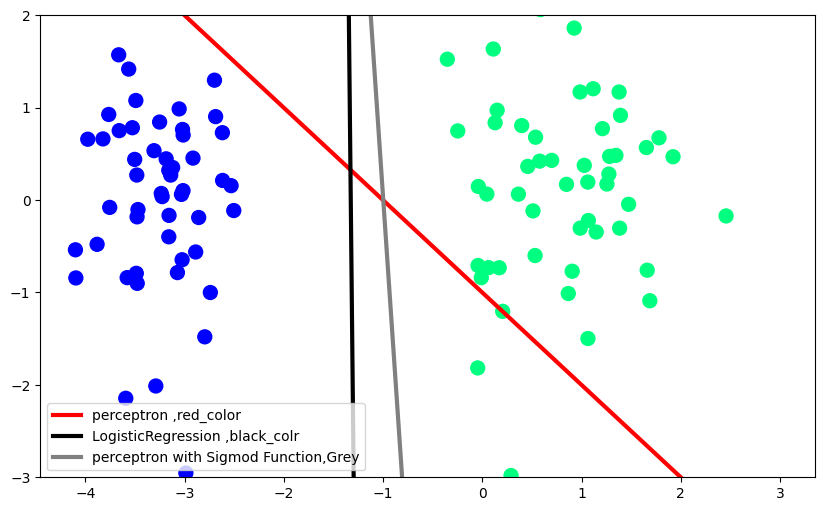

In [196]:
m  = -(coef_[0]/coef_[1])
b =-(intercept_/coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 =m*x_input + b



plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color ='red',linewidth =3,label ='perceptron ,red_color')

plt.plot(x_input1,y_input1,color ='black',linewidth =3 ,label ='LogisticRegression ,black_colr')

plt.plot(x_input2,y_input2,color ='grey',linewidth =3,label = 'perceptron with Sigmod Function,Grey')

plt.scatter(X[:,0],X[:,1],c =y,cmap='winter',s =100)

plt.legend()
plt.ylim(-3,2)




# Using Gradient Descent

In [197]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

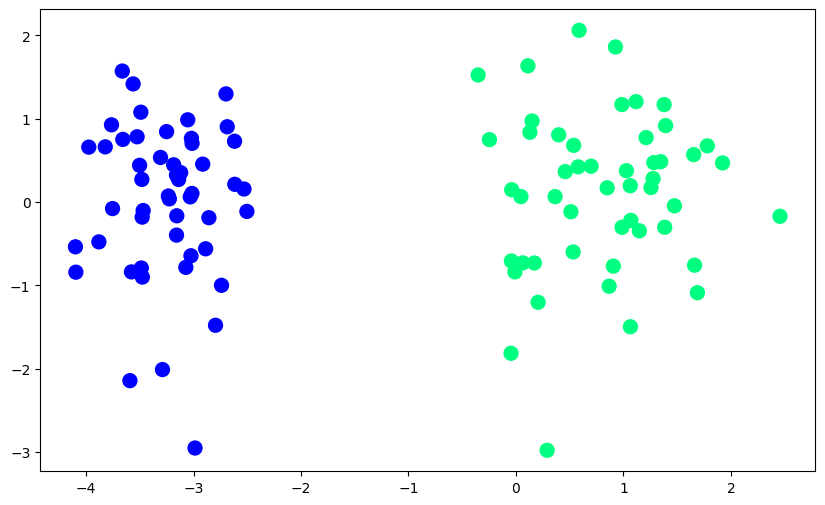

In [198]:
X,y =make_classification(n_samples=100,n_classes=2,n_clusters_per_class=1,n_features=2,n_informative=1,n_redundant=0,class_sep=20,random_state=41,hypercube=False)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1] ,c=y,cmap='winter',s =100)

plt.show()

In [202]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver ='sag') # default penalty 
lor.fit(X,y)
print(lor.coef_)
print(lor.intercept_)


[[4.8127225  0.21675353]]
[5.78080275]


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [204]:
m1 =-(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

x_input_l = np.linspace(-3,3,100)
y_input_l =  m1*x_input_l + b1

In [211]:
# make batch Gradient Class

class LogGd:
    def __init__(self,epochs,learning_rate):
        
        self.learning_rate = learning_rate
        self.epochs =epochs
        
    def fit(self,X,y):
        
        X =np.insert(X,0,1,axis=1)
        weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X,weights))
            
            weights = weights + self.learning_rate*(np.dot((y -y_hat),X)/X.shape[0]) 
            
        return weights[1:] ,weights[0]
    
    
    def sigmoid(z):
        return 1/(1 + np.exp(-z))


lor_gd =LogGd(learning_rate=0.5 ,epochs=3000)    
    
        
        
    
        

In [212]:
coef ,intercept =lor_gd.fit(X,y)

In [213]:
m2 =-(coef[0]/coef[1])
b2 = -(intercept_/coef[1])

x_input_gd = np.linspace(-3,3,100)
y_input_gd =  m2*x_input_gd + b2

(-3.0, 2.0)

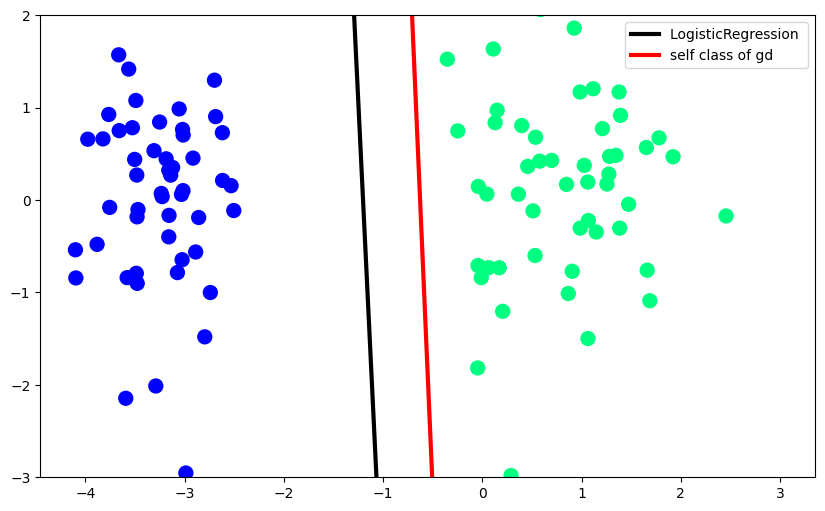

In [215]:

plt.figure(figsize=(10,6))


plt.plot(x_input_l,y_input_l,color ='black',linewidth =3 ,label ='LogisticRegression ')

plt.plot(x_input_gd,y_input_gd,color ='red',linewidth =3,label = 'self class of gd')

plt.scatter(X[:,0],X[:,1],c =y,cmap='winter',s =100)

plt.legend()
plt.ylim(-3,2)

 # ACCURACY CALCULATION

In [216]:
import pandas as pd
df =pd.read_csv('dataset\heart (1).csv')

In [217]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [218]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr =LogisticRegression()
dt =DecisionTreeClassifier()

In [222]:

dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [223]:
lr.fit(X_train,Y_train)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [224]:
lr_predict = lr.predict(X_test)
dt_predict =dt.predict(X_test)

In [226]:
#accuracy and confusion matrix

from sklearn.metrics import accuracy_score,confusion_matrix

print("accuracy_ score of LogisticRegression",accuracy_score(Y_test,lr_predict))
print("acuuracy_score of  Decisiontreeclassifier",accuracy_score(Y_test,dt_predict))

accuracy_ score of LogisticRegression 0.8390243902439024
acuuracy_score of  Decisiontreeclassifier 0.9804878048780488


In [228]:
# Confusion Matrix
print("confusion_matrix of LogisticReg\n",confusion_matrix(Y_test,lr_predict))


confusion_matrix of LogisticReg
 [[82 23]
 [10 90]]


In [230]:
#Confusion Matrix
print("confusion_matrix of DecisionTreeClassifer \n",confusion_matrix(Y_test,dt_predict))

confusion_matrix of DecisionTreeClassifer 
 [[101   4]
 [  0 100]]


In [232]:
# Precision ,Recall ,F1-Score
from sklearn.metrics import precision_score,recall_score,f1_score
print("Logisctic Model")
print("-"*50)
cdf =pd.DataFrame(confusion_matrix(Y_test,lr_predict),columns =list(range(0,2)))
print(cdf)
print("-"*50)
print("precision_score",precision_score(Y_test,lr_predict))
print("recall_score",recall_score(Y_test,lr_predict))
print("F1Score",f1_score(Y_test,lr_predict))


Logisctic Model
--------------------------------------------------
    0   1
0  82  23
1  10  90
--------------------------------------------------
precision_score 0.7964601769911505
recall_score 0.9
F1Score 0.8450704225352113


In [233]:
# Precision ,Recall ,F1-Score
from sklearn.metrics import precision_score,recall_score,f1_score
print("DecisionTree Model")
print("-"*50)
cdf =pd.DataFrame(confusion_matrix(Y_test,dt_predict),columns =list(range(0,2)))
print(cdf)
print("-"*50)
print("precision_score",precision_score(Y_test,dt_predict))
print("recall_score",recall_score(Y_test,dt_predict))
print("F1Score",f1_score(Y_test,dt_predict))


DecisionTree Model
--------------------------------------------------
     0    1
0  101    4
1    0  100
--------------------------------------------------
precision_score 0.9615384615384616
recall_score 1.0
F1Score 0.9803921568627451


In [234]:
print("precision_score",precision_score(Y_test,dt_predict,average=None))

precision_score [1.         0.96153846]


# For n classes

In [236]:
# for multiclass 
df =pd.read_csv('dataset\\train_pca_digit.csv')

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression 0.9145238095238095
Accuracy of Decision Trees 0.8522619047619048


In [248]:
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.9145238095238095
Accuracy of Decision Trees 0.8522619047619048


In [249]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,10)))

Logistic Regression Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,791,0,1,0,1,9,11,1,6,1
1,0,938,2,4,0,3,0,3,12,0
2,2,9,745,16,9,4,13,13,15,3
3,1,4,19,763,0,36,5,5,20,11
4,2,5,4,0,804,1,7,3,9,21
5,9,3,4,23,10,610,15,10,34,11
6,12,4,12,1,7,8,789,0,5,1
7,3,2,13,6,4,2,0,812,2,29
8,11,12,13,18,1,21,6,6,694,11
9,3,6,2,14,25,4,0,37,7,736


In [250]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,10)))

Decision Tree Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,751,2,13,8,11,13,9,4,7,3
1,0,897,12,11,8,9,4,5,16,0
2,8,20,665,34,16,11,19,23,24,9
3,8,15,27,690,8,47,6,15,28,20
4,7,7,10,4,726,6,11,10,21,54
5,15,6,12,37,7,585,18,11,23,15
6,10,2,7,5,9,26,756,1,16,7
7,3,10,24,13,7,4,0,789,8,15
8,10,17,24,29,15,35,11,4,621,27
9,8,5,7,16,46,21,2,26,24,679


In [254]:
print("LogisticRegression")
print("-"*50)
print("precision_score",precision_score(y_test,y_pred1,average='weighted'))
print("recall_score",recall_score(y_test,y_pred1,average='weighted'))
print('f1_score',f1_score(y_test,y_pred1,average='weighted'))

LogisticRegression
--------------------------------------------------
precision_score 0.9142150713630827
recall_score 0.9145238095238095
f1_score 0.9142794994052751


In [255]:
print('DecisionTreeClassifier')
print('-'*50)
print("precision_score",precision_score(y_test,y_pred2,average='weighted')) 
print("recall_score",recall_score(y_test,y_pred2,average='weighted'))
print('f1_score',f1_score(y_test,y_pred2,average='weighted'))

DecisionTreeClassifier
--------------------------------------------------
precision_score 0.8521397320236566
recall_score 0.8522619047619048
f1_score 0.8521256568135104


In [256]:
print('DecisionTreeClassifier')
print('macro ')
print('-'*50)


print("precision_score",precision_score(y_test,y_pred2,average='macro')) 
print("recall_score",recall_score(y_test,y_pred2,average='macro'))
print('f1_score',f1_score(y_test,y_pred2,average='macro'))

DecisionTreeClassifier
macro 
--------------------------------------------------
precision_score 0.8498929829091916
recall_score 0.8500656534561409
f1_score 0.8499018659783332


In [225]:

from sklearn.metrics import classification_report

print(classification_report(lr_predict,dt_predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        92
           1       0.87      0.80      0.83       113

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

